In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2023-ml-w4p1/train.csv
/kaggle/input/2023-ml-w4p1/test.csv
/kaggle/input/2023-ml-w4p1/sample_submit.csv


In [2]:
# 데이터 불러오기
train = pd.read_csv("/kaggle/input/2023-ml-w4p1/train.csv")
test = pd.read_csv("/kaggle/input/2023-ml-w4p1/test.csv")
submit = pd.read_csv("/kaggle/input/2023-ml-w4p1/sample_submit.csv")

In [3]:
# feature와 label 나누기
X = train.drop('label',axis=1)
Y = train['label']

In [4]:
# Label 수치화
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_labeled = le.fit_transform(Y)

In [5]:
# train과 test 나누기
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.8, random_state=1, stratify=Y)

In [6]:
# 정규화
from sklearn.preprocessing import StandardScaler

std=StandardScaler()

x_train_std = std.fit_transform(x_train)
x_test_std = std.transform(x_test)
test_std = std.transform(test)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [8]:
def whats_the_best(path,x_train,x_test,y_train=y_train,y_test=y_test,neighbors_max=15,weights='distance'):
    neighbors_list = range(1,neighbors_max+1)

    train_accuracy_list=[]
    test_accuracy_list=[]

    for i in neighbors_list:
        knn = KNeighborsClassifier(n_neighbors=i, p=path, weights=weights)
        knn.fit(x_train, y_train)
        train_predict = knn.predict(x_train)
        test_predict = knn.predict(x_test)
        train_accuracy = accuracy_score(y_train,train_predict)
        test_accuracy = accuracy_score(y_test,test_predict)
        train_accuracy_list.append(train_accuracy)
        test_accuracy_list.append(test_accuracy)
        print(i, train_accuracy, test_accuracy)
    
    return neighbors_list, train_accuracy_list, test_accuracy_list

1 1.0 0.956060606060606
2 0.9818181818181818 0.931060606060606
3 0.9848484848484849 0.95
4 0.9757575757575757 0.9378787878787879
5 0.9696969696969697 0.9416666666666667
6 0.9636363636363636 0.9348484848484848
7 0.9696969696969697 0.9393939393939394
8 0.9636363636363636 0.9287878787878788
9 0.9545454545454546 0.9272727272727272
10 0.9363636363636364 0.9234848484848485
11 0.9424242424242424 0.9242424242424242
12 0.9363636363636364 0.9174242424242425
13 0.9333333333333333 0.9136363636363637
14 0.9242424242424242 0.9068181818181819
15 0.9121212121212121 0.9053030303030303
16 0.9090909090909091 0.8977272727272727
17 0.9121212121212121 0.8909090909090909
18 0.906060606060606 0.8856060606060606
19 0.8939393939393939 0.878030303030303
20 0.8909090909090909 0.8696969696969697
21 0.8848484848484849 0.8696969696969697
22 0.8848484848484849 0.8643939393939394
23 0.8818181818181818 0.8583333333333333
24 0.8787878787878788 0.8484848484848485
25 0.8787878787878788 0.8477272727272728
26 0.869696969696

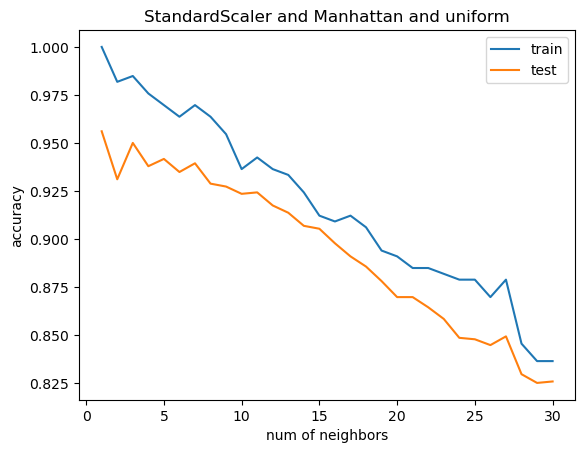

In [9]:
neighbors_num, train_accuracy, test_accuracy = whats_the_best(1,x_train_std,x_test_std,neighbors_max=30,weights='uniform')
plt.title('StandardScaler and Manhattan and uniform')
plt.plot(neighbors_num,train_accuracy)
plt.plot(neighbors_num,test_accuracy)
plt.xlabel('num of neighbors')
plt.ylabel('accuracy')
plt.legend(['train', 'test']) 
plt.show()

1 1.0 0.956060606060606
2 1.0 0.956060606060606
3 1.0 0.9553030303030303
4 1.0 0.9537878787878787
5 1.0 0.9484848484848485
6 1.0 0.9507575757575758
7 1.0 0.9484848484848485
8 1.0 0.9454545454545454
9 1.0 0.9446969696969697
10 1.0 0.9431818181818182
11 1.0 0.9446969696969697
12 1.0 0.9431818181818182
13 1.0 0.9416666666666667
14 1.0 0.9363636363636364
15 1.0 0.9333333333333333
16 1.0 0.9325757575757576
17 1.0 0.931060606060606
18 1.0 0.9287878787878788
19 1.0 0.925
20 1.0 0.921969696969697
21 1.0 0.9257575757575758
22 1.0 0.9227272727272727
23 1.0 0.921969696969697
24 1.0 0.9204545454545454
25 1.0 0.9212121212121213
26 1.0 0.9227272727272727
27 1.0 0.9212121212121213
28 1.0 0.921969696969697
29 1.0 0.9212121212121213
30 1.0 0.9181818181818182


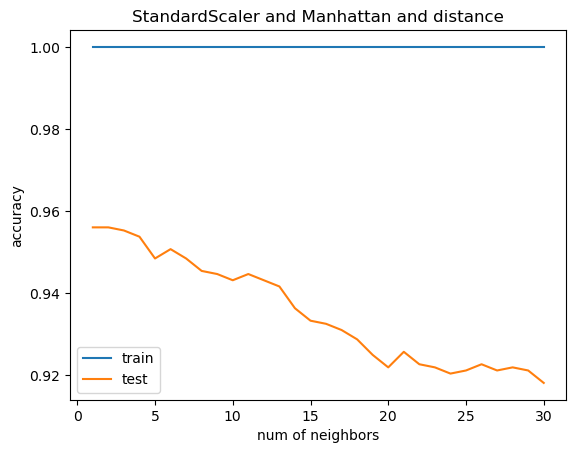

In [10]:
neighbors_num, train_accuracy, test_accuracy = whats_the_best(1,x_train_std,x_test_std,neighbors_max=30,weights='distance')
plt.title('StandardScaler and Manhattan and distance')
plt.plot(neighbors_num,train_accuracy)
plt.plot(neighbors_num,test_accuracy)
plt.xlabel('num of neighbors')
plt.ylabel('accuracy')
plt.legend(['train', 'test']) 
plt.show()

1 1.0 0.95
2 0.9848484848484849 0.9196969696969697
3 0.9757575757575757 0.9348484848484848
4 0.9666666666666667 0.921969696969697
5 0.9666666666666667 0.9204545454545454
6 0.9484848484848485 0.9090909090909091
7 0.9454545454545454 0.9090909090909091
8 0.9272727272727272 0.8924242424242425
9 0.9242424242424242 0.8848484848484849
10 0.906060606060606 0.8734848484848485
11 0.9030303030303031 0.8651515151515151
12 0.8878787878787879 0.8628787878787879
13 0.8666666666666667 0.8446969696969697
14 0.8757575757575757 0.8515151515151516
15 0.8606060606060606 0.8409090909090909
16 0.8545454545454545 0.8287878787878787
17 0.8424242424242424 0.8234848484848485
18 0.8424242424242424 0.821969696969697
19 0.8363636363636363 0.8121212121212121
20 0.8242424242424242 0.8075757575757576
21 0.8181818181818182 0.8007575757575758
22 0.7878787878787878 0.7863636363636364
23 0.7848484848484848 0.7848484848484848
24 0.7818181818181819 0.7734848484848484
25 0.7727272727272727 0.7666666666666667
26 0.76666666666

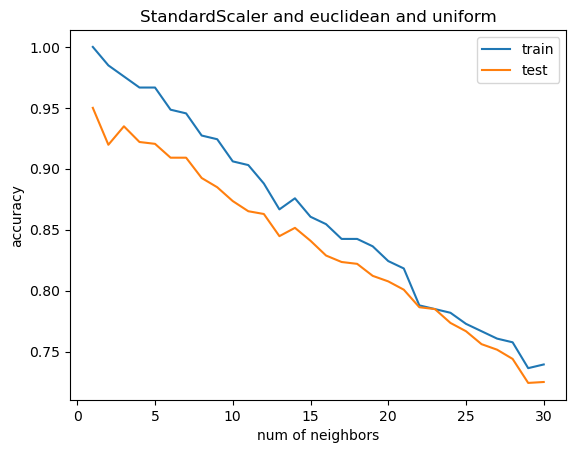

In [11]:
neighbors_num, train_accuracy, test_accuracy = whats_the_best(2,x_train_std,x_test_std,neighbors_max=30,weights='uniform')
plt.title('StandardScaler and euclidean and uniform')
plt.plot(neighbors_num,train_accuracy)
plt.plot(neighbors_num,test_accuracy)
plt.xlabel('num of neighbors')
plt.ylabel('accuracy')
plt.legend(['train', 'test']) 
plt.show()

1 1.0 0.95
2 1.0 0.95
3 1.0 0.9401515151515152
4 1.0 0.9393939393939394
5 1.0 0.9333333333333333
6 1.0 0.9318181818181818
7 1.0 0.925
8 1.0 0.9227272727272727
9 1.0 0.9174242424242425
10 1.0 0.9113636363636364
11 1.0 0.9068181818181819
12 1.0 0.9053030303030303
13 1.0 0.9045454545454545
14 1.0 0.9022727272727272
15 1.0 0.8992424242424243
16 1.0 0.8916666666666667
17 1.0 0.8871212121212121
18 1.0 0.8772727272727273
19 1.0 0.8727272727272727
20 1.0 0.8696969696969697
21 1.0 0.8689393939393939
22 1.0 0.865909090909091
23 1.0 0.8674242424242424
24 1.0 0.8651515151515151
25 1.0 0.8681818181818182
26 1.0 0.8704545454545455
27 1.0 0.8681818181818182
28 1.0 0.8689393939393939
29 1.0 0.8712121212121212
30 1.0 0.8696969696969697


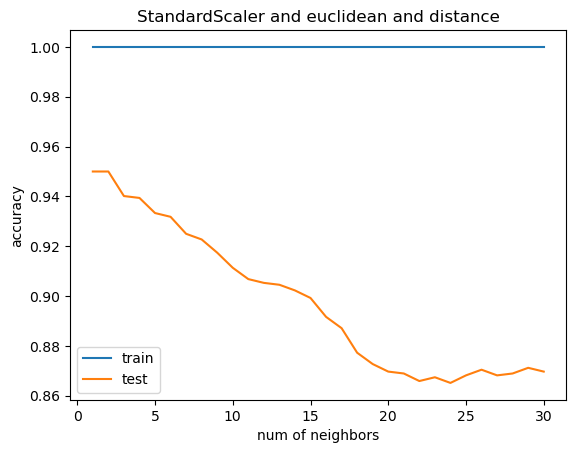

In [12]:
neighbors_num, train_accuracy, test_accuracy = whats_the_best(2,x_train_std,x_test_std,neighbors_max=30,weights='distance')
plt.title('StandardScaler and euclidean and distance')
plt.plot(neighbors_num,train_accuracy)
plt.plot(neighbors_num,test_accuracy)
plt.xlabel('num of neighbors')
plt.ylabel('accuracy')
plt.legend(['train', 'test']) 
plt.show()

1 1.0 0.9712121212121212
2 0.9757575757575757 0.943939393939394
3 0.9848484848484849 0.968939393939394
4 0.9757575757575757 0.956060606060606
5 0.9787878787878788 0.9674242424242424
6 0.9757575757575757 0.9583333333333334
7 0.9727272727272728 0.9651515151515152
8 0.9666666666666667 0.9606060606060606
9 0.9757575757575757 0.9613636363636363
10 0.9696969696969697 0.9553030303030303
11 0.9727272727272728 0.9553030303030303
12 0.9696969696969697 0.953030303030303
13 0.9606060606060606 0.9515151515151515
14 0.9545454545454546 0.9462121212121212
15 0.9454545454545454 0.9454545454545454
16 0.9424242424242424 0.9378787878787879
17 0.9424242424242424 0.9409090909090909
18 0.9454545454545454 0.9356060606060606
19 0.9393939393939394 0.9371212121212121
20 0.9303030303030303 0.931060606060606
21 0.9303030303030303 0.928030303030303
22 0.9303030303030303 0.9242424242424242
23 0.9242424242424242 0.925
24 0.9303030303030303 0.918939393939394
25 0.9333333333333333 0.9151515151515152
26 0.92727272727272

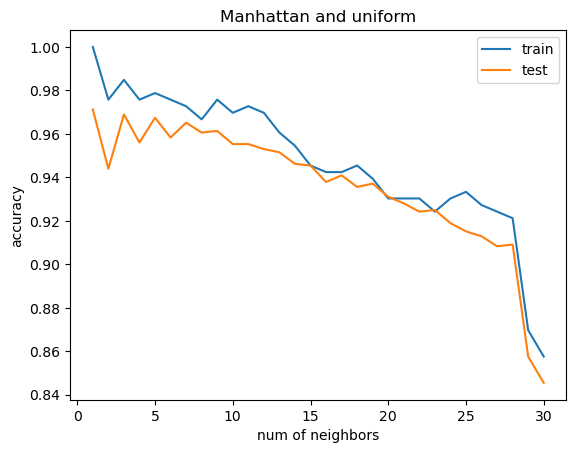

In [13]:
neighbors_num, train_accuracy, test_accuracy = whats_the_best(1,x_train,x_test,neighbors_max=30,weights='uniform')
plt.title('Manhattan and uniform')
plt.plot(neighbors_num,train_accuracy)
plt.plot(neighbors_num,test_accuracy)
plt.xlabel('num of neighbors')
plt.ylabel('accuracy')
plt.legend(['train', 'test']) 
plt.show()

1 1.0 0.9712121212121212
2 1.0 0.9712121212121212
3 1.0 0.9704545454545455
4 1.0 0.9727272727272728
5 1.0 0.968939393939394
6 1.0 0.9704545454545455
7 1.0 0.9712121212121212
8 1.0 0.9712121212121212
9 1.0 0.9674242424242424
10 1.0 0.9666666666666667
11 1.0 0.9621212121212122
12 1.0 0.9606060606060606
13 1.0 0.9613636363636363
14 1.0 0.9590909090909091
15 1.0 0.9606060606060606
16 1.0 0.9568181818181818
17 1.0 0.9568181818181818
18 1.0 0.953030303030303
19 1.0 0.9507575757575758
20 1.0 0.95
21 1.0 0.95
22 1.0 0.9507575757575758
23 1.0 0.9515151515151515
24 1.0 0.9484848484848485
25 1.0 0.9484848484848485
26 1.0 0.943939393939394
27 1.0 0.9424242424242424
28 1.0 0.9431818181818182
29 1.0 0.9431818181818182
30 1.0 0.9424242424242424


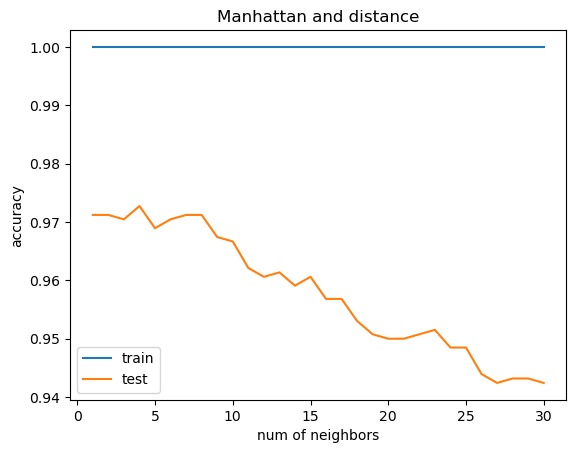

In [14]:
neighbors_num, train_accuracy, test_accuracy = whats_the_best(1,x_train,x_test,neighbors_max=30,weights='distance')
plt.title('Manhattan and distance')
plt.plot(neighbors_num,train_accuracy)
plt.plot(neighbors_num,test_accuracy)
plt.xlabel('num of neighbors')
plt.ylabel('accuracy')
plt.legend(['train', 'test']) 
plt.show()

1 1.0 0.9666666666666667
2 0.9757575757575757 0.9462121212121212
3 0.9878787878787879 0.9651515151515152
4 0.9757575757575757 0.9484848484848485
5 0.9696969696969697 0.9583333333333334
6 0.9666666666666667 0.9477272727272728
7 0.9696969696969697 0.9553030303030303
8 0.9696969696969697 0.9477272727272728
9 0.9666666666666667 0.9462121212121212
10 0.9606060606060606 0.9378787878787879
11 0.9636363636363636 0.9393939393939394
12 0.9515151515151515 0.9265151515151515
13 0.9515151515151515 0.925
14 0.9363636363636364 0.9196969696969697
15 0.9303030303030303 0.9181818181818182
16 0.9333333333333333 0.9090909090909091
17 0.9242424242424242 0.9113636363636364
18 0.9242424242424242 0.9022727272727272
19 0.9242424242424242 0.8984848484848484
20 0.9121212121212121 0.8946969696969697
21 0.906060606060606 0.8924242424242425
22 0.9030303030303031 0.8893939393939394
23 0.906060606060606 0.8886363636363637
24 0.8909090909090909 0.8863636363636364
25 0.8878787878787879 0.8803030303030303
26 0.890909090

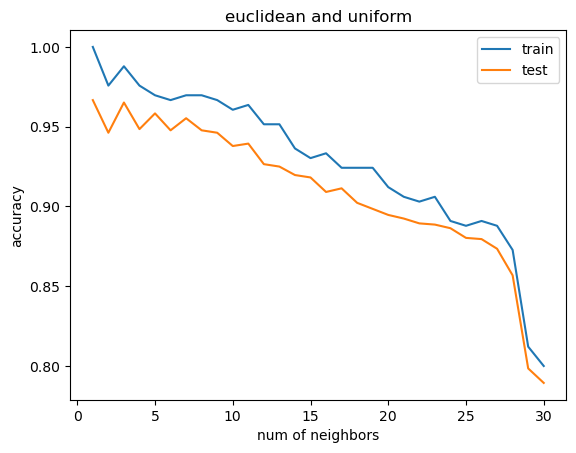

In [15]:
neighbors_num, train_accuracy, test_accuracy = whats_the_best(2,x_train,x_test,neighbors_max=30,weights='uniform')
plt.title('euclidean and uniform')
plt.plot(neighbors_num,train_accuracy)
plt.plot(neighbors_num,test_accuracy)
plt.xlabel('num of neighbors')
plt.ylabel('accuracy')
plt.legend(['train', 'test']) 
plt.show()

1 1.0 0.9666666666666667
2 1.0 0.9666666666666667
3 1.0 0.9659090909090909
4 1.0 0.9651515151515152
5 1.0 0.9643939393939394
6 1.0 0.9628787878787879
7 1.0 0.9590909090909091
8 1.0 0.9636363636363636
9 1.0 0.9590909090909091
10 1.0 0.9553030303030303
11 1.0 0.9537878787878787
12 1.0 0.9537878787878787
13 1.0 0.9462121212121212
14 1.0 0.9431818181818182
15 1.0 0.9409090909090909
16 1.0 0.9401515151515152
17 1.0 0.9371212121212121
18 1.0 0.9340909090909091
19 1.0 0.9356060606060606
20 1.0 0.9340909090909091
21 1.0 0.9303030303030303
22 1.0 0.9303030303030303
23 1.0 0.9325757575757576
24 1.0 0.9318181818181818
25 1.0 0.9318181818181818
26 1.0 0.9318181818181818
27 1.0 0.928030303030303
28 1.0 0.9257575757575758
29 1.0 0.9234848484848485
30 1.0 0.921969696969697


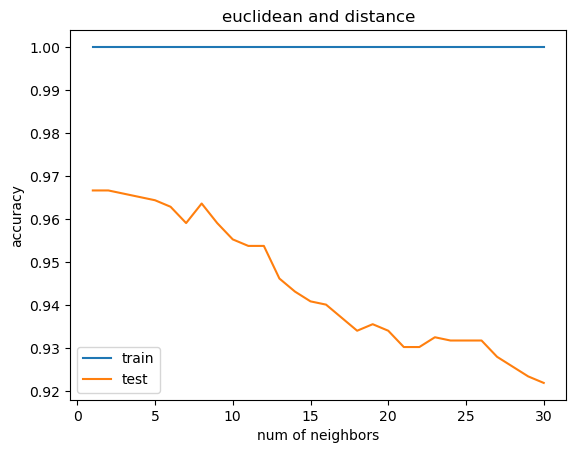

In [16]:
neighbors_num, train_accuracy, test_accuracy = whats_the_best(2,x_train,x_test,neighbors_max=30,weights='distance')
plt.title('euclidean and distance')
plt.plot(neighbors_num,train_accuracy)
plt.plot(neighbors_num,test_accuracy)
plt.xlabel('num of neighbors')
plt.ylabel('accuracy')
plt.legend(['train', 'test']) 
plt.show()

In [17]:
# 멘헤탄, 가중합, k=4, 표준화 하지 않았을 때 가장 좋은 결과를 보임
knn = KNeighborsClassifier(n_neighbors=4, p=1, weights='distance')
knn.fit(X, Y_labeled)
predict = knn.predict(test)
predict_label = le.inverse_transform(predict)

In [18]:
submit['label']= predict_label
# submit=submit.astype(np.string)
submit.to_csv('submit.csv', mode='w', header= True, index= False)

In [19]:
submit

,id,label
0,0,muskmelon
1,1,watermelon
2,2,papaya
3,3,papaya
4,4,apple
...,...,...
545,545,coffee
546,546,papaya
547,547,chickpea
548,548,coffee
